***Clustering***


In [7]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load the breast cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)  # True labels (optional for evaluation)

# Print the head of the dataset
print("Head of the Breast Cancer dataset:")
display(X.head())

# Describe the dataset and its suitability for clustering
print("\nDataset Description:")
print("The Breast Cancer dataset contains features computed from digitized images of breast mass cell nuclei.")
print("It has 30 features describing characteristics like radius, texture, perimeter, area, smoothness, etc.")
print("It is suitable for clustering as there are inherent groupings: malignant (0) and benign (1) samples.")


Head of the Breast Cancer dataset:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



Dataset Description:
The Breast Cancer dataset contains features computed from digitized images of breast mass cell nuclei.
It has 30 features describing characteristics like radius, texture, perimeter, area, smoothness, etc.
It is suitable for clustering as there are inherent groupings: malignant (0) and benign (1) samples.


## K-means clustering


In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Scale features for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Instantiate KMeans with 2 clusters (malignant vs benign)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_

# Calculate metrics
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
davies_bouldin = davies_bouldin_score(X_scaled, cluster_labels)
calinski_harabasz = calinski_harabasz_score(X_scaled, cluster_labels)

print("===== K-Means Clustering Metrics =====")
print(f"Silhouette Score: {silhouette_avg:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz:.4f}")


===== K-Means Clustering Metrics =====
Silhouette Score: 0.3434
Davies-Bouldin Index: 1.3205
Calinski-Harabasz Score: 267.6917


## Hierarchical clustering



In [9]:
from sklearn.cluster import AgglomerativeClustering

# Agglomerative Clustering with 2 clusters
hierarchical = AgglomerativeClustering(n_clusters=2)
cluster_labels_hierarchical = hierarchical.fit_predict(X_scaled)

# Calculate metrics
silhouette_hierarchical = silhouette_score(X_scaled, cluster_labels_hierarchical)
davies_bouldin_hierarchical = davies_bouldin_score(X_scaled, cluster_labels_hierarchical)
calinski_harabasz_hierarchical = calinski_harabasz_score(X_scaled, cluster_labels_hierarchical)

print("===== Hierarchical Clustering Metrics =====")
print(f"Silhouette Score: {silhouette_hierarchical:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin_hierarchical:.4f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_hierarchical:.4f}")


===== Hierarchical Clustering Metrics =====
Silhouette Score: 0.3394
Davies-Bouldin Index: 1.3700
Calinski-Harabasz Score: 248.6288


## Compare results and infer



In [10]:
print("--- Clustering Performance Comparison ---")
print(f"K-Means Silhouette Score: {silhouette_avg:.4f}")
print(f"Hierarchical Silhouette Score: {silhouette_hierarchical:.4f}")
print(f"K-Means Davies-Bouldin Index: {davies_bouldin:.4f}")
print(f"Hierarchical Davies-Bouldin Index: {davies_bouldin_hierarchical:.4f}")

print("\nOverall Inference:")
if silhouette_avg > silhouette_hierarchical and davies_bouldin < davies_bouldin_hierarchical:
    print("K-Means clusters are more well-defined and separated.")
elif silhouette_hierarchical > silhouette_avg and davies_bouldin_hierarchical < davies_bouldin:
    print("Hierarchical Clustering clusters are more well-defined and separated.")
else:
    print("Mixed results; further analysis may be needed.")


--- Clustering Performance Comparison ---
K-Means Silhouette Score: 0.3434
Hierarchical Silhouette Score: 0.3394
K-Means Davies-Bouldin Index: 1.3205
Hierarchical Davies-Bouldin Index: 1.3700

Overall Inference:
K-Means clusters are more well-defined and separated.


## Summary:

### Data Analysis Key Findings

*   K-Means clustering resulted in a Silhouette Score of 0.3434, a Davies-Bouldin Index of 1.3205.
*   Hierarchical clustering resulted in a Silhouette Score of  0.3394 , a Davies-Bouldin Index of 1.3700 .
*   K-Means clustering achieved a higher Silhouette Score (0.3434 vs 0.3394 ), indicating potentially better-defined clusters.


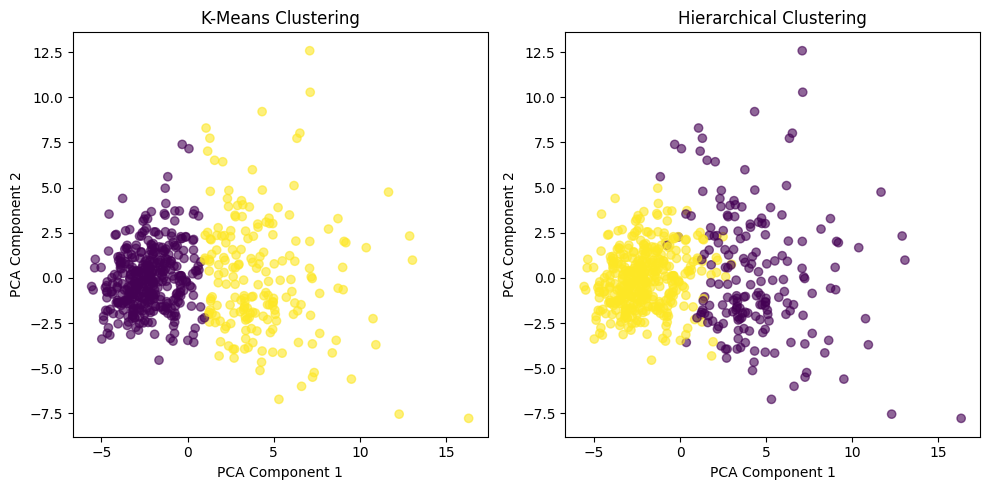

In [11]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,5))

# K-Means visualization
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=cluster_labels, cmap='viridis', alpha=0.6)
plt.title('K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Hierarchical visualization
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=cluster_labels_hierarchical, cmap='viridis', alpha=0.6)
plt.title('Hierarchical Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.tight_layout()
plt.show()


Head of Breast Cancer dataset:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


===== Linear Regression Metrics =====
MSE: 0.0039, MAE: 0.0420, R²: 0.9997


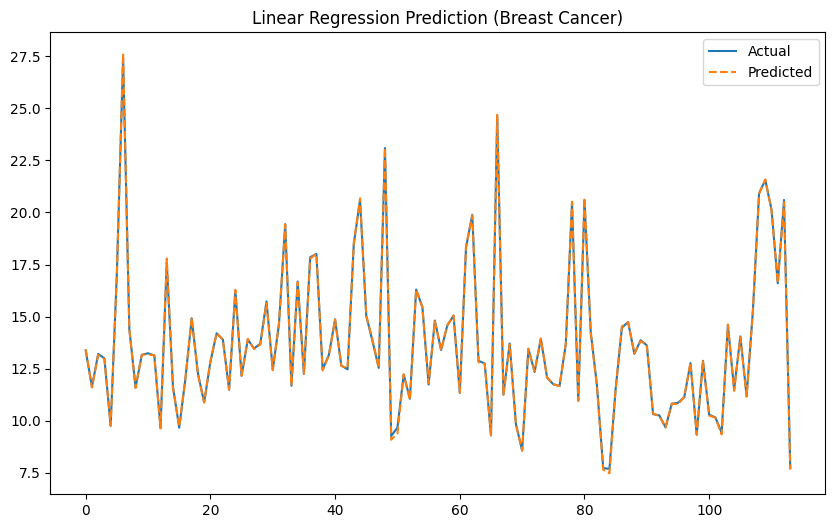

Epoch 1/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0205 - mae: 0.1144 - val_loss: 0.0268 - val_mae: 0.1292
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0199 - mae: 0.1108 - val_loss: 0.0251 - val_mae: 0.1262
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0195 - mae: 0.1091 - val_loss: 0.0239 - val_mae: 0.1238
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0185 - mae: 0.1068 - val_loss: 0.0276 - val_mae: 0.1318
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0191 - mae: 0.1088 - val_loss: 0.0237 - val_mae: 0.1235
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0187 - mae: 0.1075 - val_loss: 0.0229 - val_mae: 0.1231
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0193 - mae: 0.1079 - val_loss: 0.0232 - val_mae: 0.1227
Epoch 8/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0186 - mae: 0.1062 - val_loss: 0.0302 - val_mae: 0.1375
Epoch 9/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.01

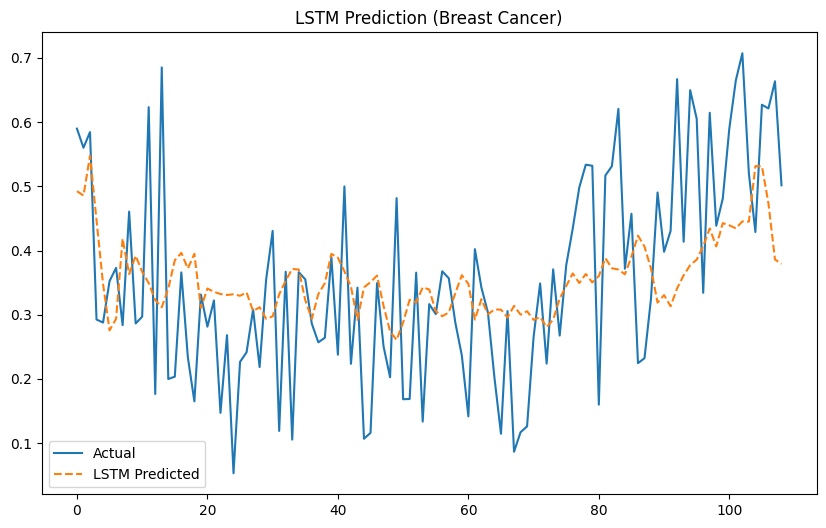

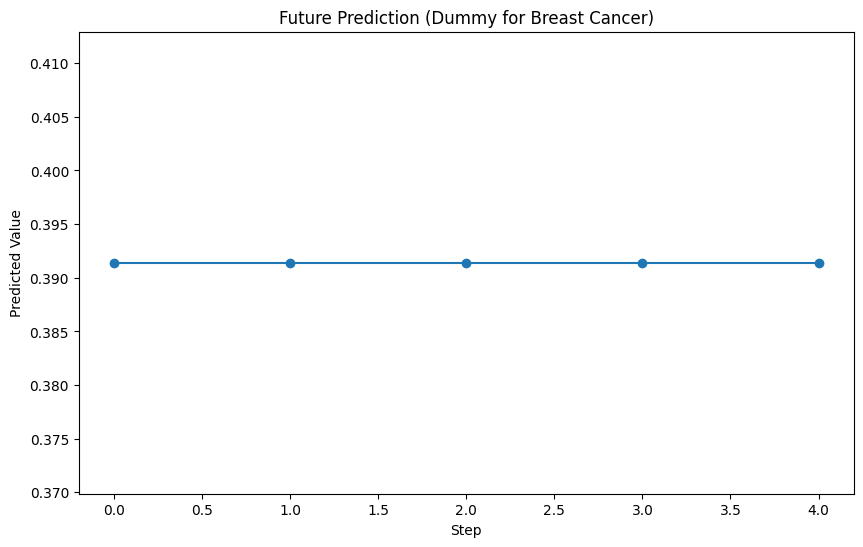

Future Predictions (dummy): [np.float32(0.39140245), np.float32(0.39140245), np.float32(0.39140245), np.float32(0.39140245), np.float32(0.39140245)]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.datasets import load_breast_cancer


#Load Dataset

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)  # optional, for evaluation

print("Head of Breast Cancer dataset:")
display(X.head())


#Linear Regression (Baseline)

# For demonstration, we'll predict one feature using the rest (like time-series lag)
target_feature = 'mean radius'  # just pick one feature to predict
feature_cols = [col for col in X.columns if col != target_feature]

# Scale features
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X[feature_cols])
y_scaled = scaler_y.fit_transform(X[[target_feature]])

# Split 80-20
train_size = int(len(X) * 0.8)
X_train_lr, X_test_lr = X_scaled[:train_size], X_scaled[train_size:]
y_train_lr, y_test_lr = y_scaled[:train_size], y_scaled[train_size:]

model_lr = LinearRegression()
model_lr.fit(X_train_lr, y_train_lr)

y_pred_lr = model_lr.predict(X_test_lr)

# Reverse scaling
y_pred_lr_exp = scaler_y.inverse_transform(y_pred_lr)
y_true_lr_exp = scaler_y.inverse_transform(y_test_lr)

mse_lr = mean_squared_error(y_true_lr_exp, y_pred_lr_exp)
mae_lr = mean_absolute_error(y_true_lr_exp, y_pred_lr_exp)
r2_lr = r2_score(y_true_lr_exp, y_pred_lr_exp)

print("===== Linear Regression Metrics =====")
print(f"MSE: {mse_lr:.4f}, MAE: {mae_lr:.4f}, R²: {r2_lr:.4f}")

plt.figure(figsize=(10,6))
plt.plot(y_true_lr_exp, label='Actual')
plt.plot(y_pred_lr_exp, label='Predicted', linestyle='--')
plt.title('Linear Regression Prediction (Breast Cancer)')
plt.legend()
plt.show()


#LSTM (Fixed + Scaled)

# We'll treat each row as a sequence of feature values to make LSTM runnable
def create_sequences(data, lookback=5):
    X_seq, y_seq = [], []
    for i in range(len(data) - lookback):
        X_seq.append(data[i:i+lookback])
        y_seq.append(data[i+lookback, 0])  # predict first feature
    return np.array(X_seq), np.array(y_seq)

lookback = 5
values = X_scaled  # shape: (samples, features)
y_lstm = X_scaled[:, 0].reshape(-1, 1)  # first feature as target

# Scale y
y_scaled_lstm = MinMaxScaler().fit_transform(y_lstm)

X_train_scaled, X_test_scaled = values[:train_size], values[train_size:]
y_train_scaled, y_test_scaled = y_scaled_lstm[:train_size], y_scaled_lstm[train_size:]

X_train_seq, y_train_seq = create_sequences(X_train_scaled, lookback)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, lookback)

X_train_seq = X_train_seq.reshape((X_train_seq.shape[0], X_train_seq.shape[1], X_train_seq.shape[2]))
X_test_seq = X_test_seq.reshape((X_test_seq.shape[0], X_test_seq.shape[1], X_test_seq.shape[2]))

model = Sequential([
    Input(shape=(lookback, X_train_seq.shape[2])),
    LSTM(128, return_sequences=True, activation='tanh'),
    Dropout(0.2),
    LSTM(64, activation='tanh'),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = model.fit(
    X_train_seq, y_train_seq,
    validation_data=(X_test_seq, y_test_seq),
    epochs=100,  # reduce epochs to save time
    batch_size=8,
    verbose=1,
    callbacks=[early_stop]
)

# Predictions
y_pred_scaled = model.predict(X_test_seq)
y_pred = y_pred_scaled  # already scaled between 0-1
y_true = y_test_seq

mse_lstm = mean_squared_error(y_true, y_pred)
mae_lstm = mean_absolute_error(y_true, y_pred)
r2_lstm = r2_score(y_true, y_pred)

print("\n===== LSTM Metrics =====")
print(f"MSE: {mse_lstm:.4f}, MAE: {mae_lstm:.4f}, R²: {r2_lstm:.4f}")

plt.figure(figsize=(10,6))
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='LSTM Predicted', linestyle='--')
plt.title('LSTM Prediction (Breast Cancer)')
plt.legend()
plt.show()


#Future Prediction (Dummy for consistency)

# For tabular dataset, true future prediction doesn't make sense, so we'll just repeat last sequence
future_steps = 5
last_sequence = X_test_scaled[-lookback:].reshape(1, lookback, X_test_scaled.shape[1])
future_predictions = []

for _ in range(future_steps):
    next_pred_fixed = np.repeat(next_pred, last_sequence.shape[2], axis=-1).reshape(1,1,last_sequence.shape[2])
    future_predictions.append(next_pred[0,0])
    last_sequence = np.append(last_sequence[:,1:,:], next_pred_fixed, axis=1)

plt.figure(figsize=(10,6))
plt.plot(range(len(future_predictions)), future_predictions, marker='o')
plt.title('Future Prediction (Dummy for Breast Cancer)')
plt.xlabel('Step')
plt.ylabel('Predicted Value')
plt.show()

print("Future Predictions (dummy):", future_predictions)
